<a href="https://colab.research.google.com/github/nguyentientuanh/DA/blob/main/Ti%E1%BB%81n_x%E1%BB%AD_l%C3%BD_d%E1%BB%AF_li%E1%BB%87u_%E2%80%93_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Bài đọc] Xử lý dữ liệu khuyết thiếu

In [5]:
import pandas as pd
import numpy as np

In [6]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0       1
1       2
2    <NA>
3       4
dtype: Int64

In [7]:
s = pd.Series([5, 6, np.nan])
s.isna()  # kiểm tra phần tử nào bị khuyết

0    False
1    False
2     True
dtype: bool

In [8]:
s.notna()  # kiểm tra phần tử nào không bị khuyết

0     True
1     True
2    False
dtype: bool

In [9]:
s.dropna()

0    5.0
1    6.0
dtype: float64

In [11]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [12]:
df.dropna()  # xóa dòng mà có ít nhất 1 dữ phần tử bị khuyết.

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [13]:
df.dropna(axis='columns')   # cũng có thể thực hiện df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [14]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [15]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [16]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [17]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [19]:
df.fillna(method="ffill")

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [20]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)  # giá trị Nan ở cột A, B, C, D thay lần lượt là 0,1,2,3.

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [21]:
df = pd.Series([1, np.nan, np.nan, 3])
df.interpolate()

0    1.000000
1    1.666667
2    2.333333
3    3.000000
dtype: float64

##[Bài đọc] Xử lý dữ liệu ngoại lai

In [ ]:
#fgafa

## [Thực hành] Chuẩn hoá dữ liệu với Z-Score Scaling

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [25]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [26]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [27]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,57.671077,9.020801,11.387563,34.468221,18.848528
1,59.383694,3.536553,14.623463,23.327642,23.971565
2,50.335971,4.335738,8.970859,7.859207,14.260365
3,51.917183,9.439762,8.878956,14.158825,15.701289
4,57.994132,3.839038,11.306582,7.986121,25.039835


<Axes: ylabel='Density'>

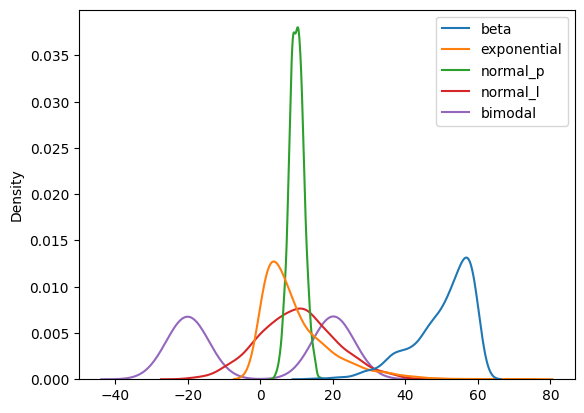

In [28]:
sns.kdeplot(data=df)

<Axes: ylabel='Density'>

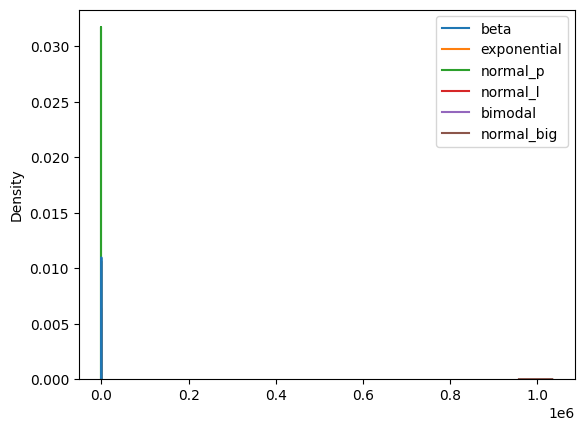

In [29]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

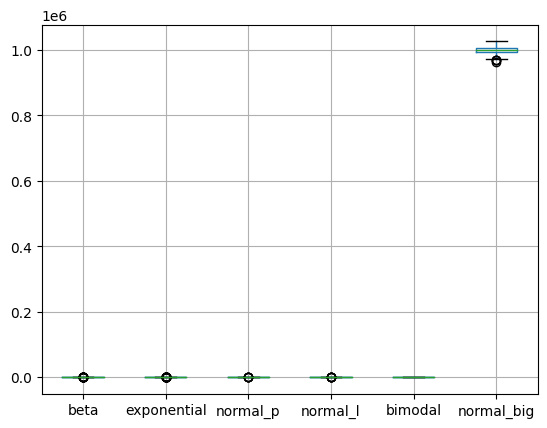

In [30]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

##[Thực hành] Phân tích review của khách hàng

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [34]:
df = pd.read_csv("/content/Credit_Scoring.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27.0,0.0,46.000000,NaN,2.0,0.0,0.0,0.0,NaN
1,10,0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,11,0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12,0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13,0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0


In [35]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104618 entries, 0 to 104617
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            104618 non-null  int64  
 1   SeriousDlqin2yrs                      104618 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  104618 non-null  float64
 3   age                                   104617 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  104617 non-null  float64
 5   DebtRatio                             104617 non-null  float64
 6   MonthlyIncome                         83920 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       104617 non-null  float64
 8   NumberOfTimes90DaysLate               104617 non-null  float64
 9   NumberRealEstateLoansOrLines          104617 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  104617 non-null  float64
 11  

In [36]:
# mô tả dữ liệu
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,104618.000000,104618.000000,104618.000000,104617.000000,104617.000000,104617.000000,8.392000e+04,104617.000000,104617.000000,104617.000000,104617.000000,101872.000000
mean,52317.500000,0.066767,6.022502,52.258629,0.423459,354.804733,6.635433e+03,8.443733,0.269115,1.018840,0.242762,0.758010
std,30200.759568,0.249619,257.986153,14.768859,4.228904,2107.918633,1.361455e+04,5.137286,4.205310,1.134894,4.191887,1.116073
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26163.250000,0.000000,0.029999,41.000000,0.000000,0.175134,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,52317.500000,0.000000,0.156003,52.000000,0.000000,0.366278,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,78471.750000,0.000000,0.562284,63.000000,0.000000,0.866935,8.226250e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,104626.000000,1.000000,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [37]:
# kiểm tra dữ liệu khuyết thiếu
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
104613,False,False,False,False,False,False,False,False,False,False,False,False
104614,False,False,False,False,False,False,False,False,False,False,False,False
104615,False,False,False,False,False,False,False,False,False,False,False,False
104616,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# loại bỏ dữ liệu khuyết thiếu
df1 = df.dropna()

In [39]:
# % số lượng bản ghi còn lại
100 * df1.shape[0]/df.shape[0]

80.21564166778184

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

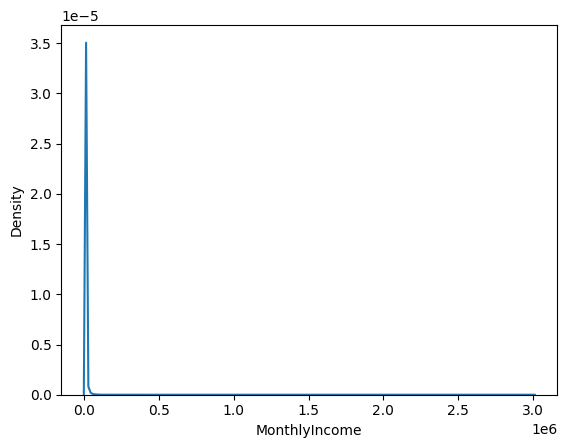

In [40]:
# vẽ biểu đồ phân bố
sns.kdeplot(data=df1["MonthlyIncome"])

In [41]:
# thay thế dữ liệu khuyết thiếu bởi giá trị nội suy theo cột
df2 = df.interpolate(axis=1)

In [42]:
df2.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
104613,False,False,False,False,False,False,False,False,False,False,False,False
104614,False,False,False,False,False,False,False,False,False,False,False,False
104615,False,False,False,False,False,False,False,False,False,False,False,False
104616,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

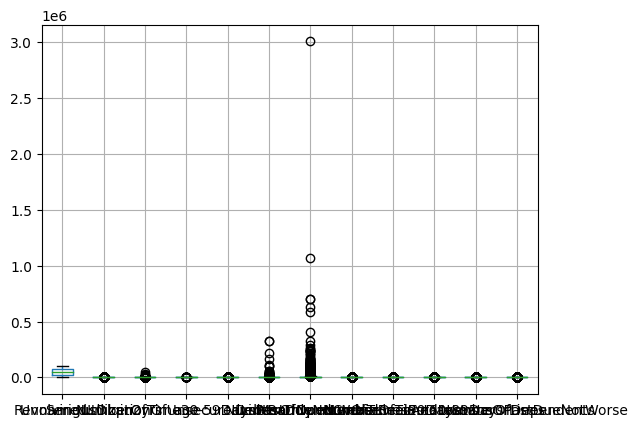

In [43]:
# vẽ biểu đồ boxplot cho các đặc trưng
df2.boxplot()

<Axes: ylabel='MonthlyIncome'>

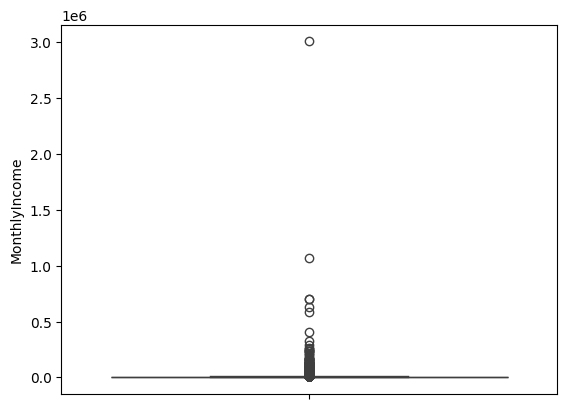

In [44]:
# vẽ biểu đồ box plot cho MonthlyIncome
sns.boxplot(df2["MonthlyIncome"])

In [45]:
# tính giá trị Q1 và Q3
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

In [46]:
# tính IQR
IQR = Q3-Q1

In [47]:
# lọc dữ liệu ngoại lai
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

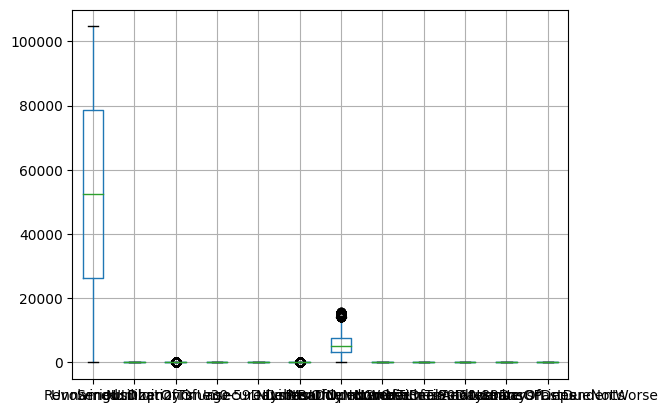

In [48]:
df3.boxplot()

<Axes: ylabel='MonthlyIncome'>

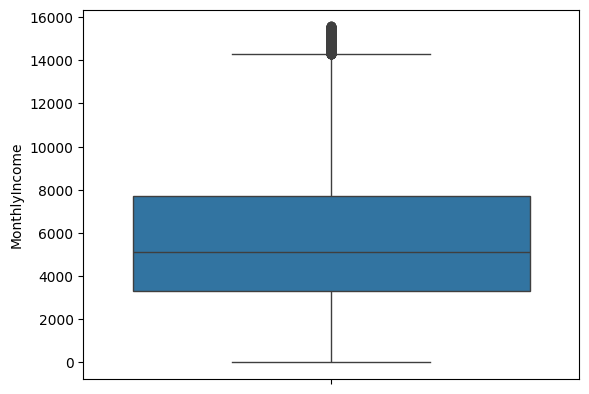

In [49]:
sns.boxplot(df3["MonthlyIncome"])

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

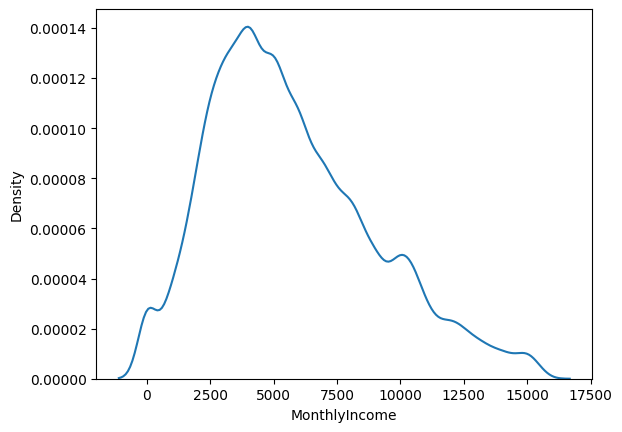

In [50]:
# phân bố dữ liệu trên cột MonthlyIncome
sns.kdeplot(data = df3['MonthlyIncome'])

In [52]:
scaler = MinMaxScaler()
mms = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

<Axes: ylabel='Density'>

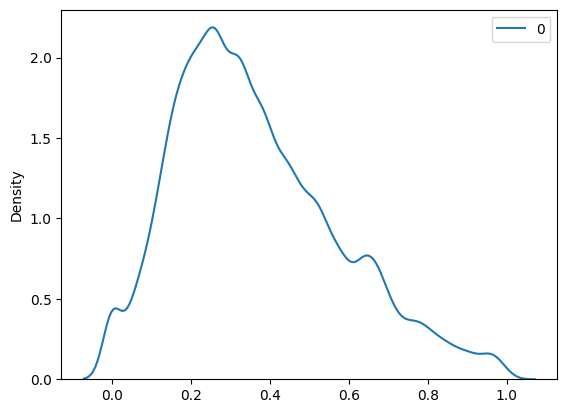

In [53]:
sns.kdeplot(data = mms)

In [54]:
# chuẩn hóa với robust scaling
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

<Axes: ylabel='Density'>

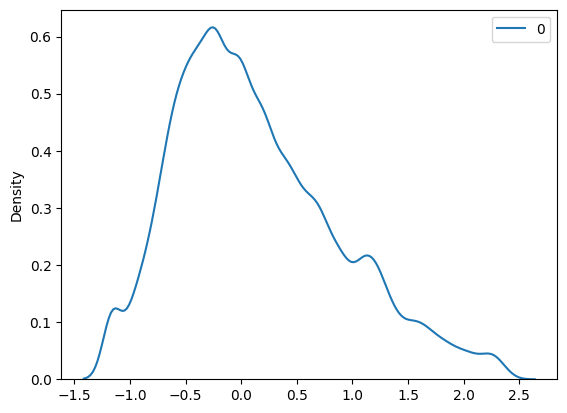

In [55]:
sns.kdeplot(data = rbs)

In [56]:
# chuẩn hóa với standard scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

<Axes: ylabel='Density'>

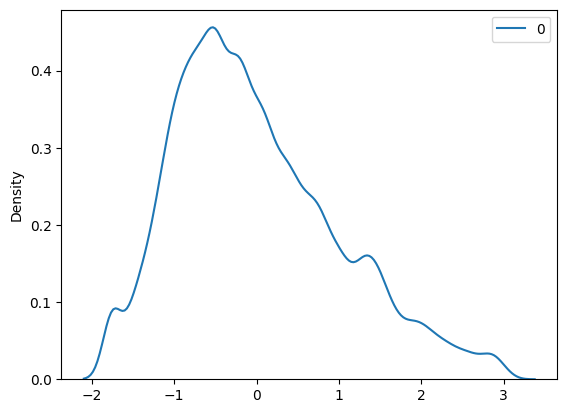

In [57]:
sns.kdeplot(data = sc)